# Expl. 2-1) Optical recognition of handwritten digits dataset



In [34]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

##### 1) 모델 학습, 수행

In [23]:
hand_written = load_digits()
data_hw = hand_written.data
label_hw = hand_written.target

# Optical recognition of handwritten digits dataset
- data description : https://scikit-learn.org/stable/datasets/toy_dataset.html#optical-recognition-of-handwritten-digits-dataset


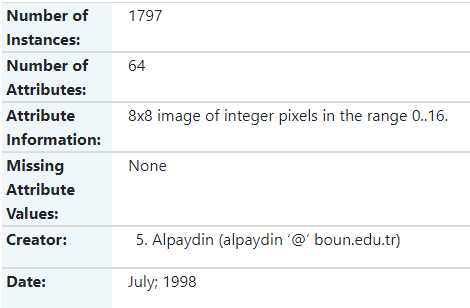

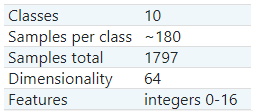

In [13]:
print(hand_written.keys())


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [18]:
# Feature Data 지정하기
print(hand_written.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [17]:
# Label Data 지정하기
print(hand_written.target)

[0 1 2 ... 8 9 8]


In [15]:
# Target Names 출력해 보기
print(hand_written.target_names)

[0 1 2 3 4 5 6 7 8 9]


In [16]:
# 데이터 Describe 해 보기
print(hand_written.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

##### 2) 데이터 분리 (train, test)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(data_hw, label_hw, test_size=0.2, random_state=1)

print(x_train)
print(x_test)
print(y_train)
print(y_test)


[[ 0.  0.  0. ...  5.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ... 13. 12.  2.]
 ...
 [ 0.  0.  7. ... 13.  2.  0.]
 [ 0.  0.  0. ... 16.  1.  0.]
 [ 0.  0.  8. ...  0.  0.  0.]]
[[ 0.  0.  6. ...  3.  0.  0.]
 [ 0.  8. 13. ...  0.  0.  0.]
 [ 0.  0.  4. ...  6.  0.  0.]
 ...
 [ 0.  0.  0. ...  1.  0.  0.]
 [ 0.  3. 15. ... 16. 16.  2.]
 [ 0.  0.  8. ...  0.  0.  0.]]
[4 9 6 ... 9 1 5]
[1 5 0 7 1 0 6 1 5 4 9 2 7 8 4 6 9 3 7 4 7 1 8 6 0 9 6 1 3 7 5 9 8 3 2 8 8
 1 1 0 7 9 0 0 8 7 2 7 4 3 4 3 4 0 4 7 0 5 5 5 2 1 7 0 5 1 8 3 3 4 0 3 7 4
 3 4 2 9 7 3 2 5 3 4 1 5 5 2 5 2 2 2 2 7 0 8 1 7 4 2 3 8 2 3 3 0 2 9 9 2 3
 2 8 1 1 9 1 2 0 4 8 5 4 4 7 6 7 6 6 1 7 5 6 3 8 3 7 1 8 5 3 4 7 8 5 0 6 0
 6 3 7 6 5 6 2 2 2 3 0 7 6 5 6 4 1 0 6 0 6 4 0 9 3 8 1 2 3 1 9 0 7 6 2 9 3
 5 3 4 6 3 3 7 4 9 2 7 6 1 6 8 4 0 3 1 0 9 9 9 0 1 8 6 8 0 9 5 9 8 2 3 5 3
 0 8 7 4 0 3 3 3 6 3 3 2 9 1 6 9 0 4 2 2 7 9 1 6 7 6 3 7 1 9 3 4 0 6 4 8 5
 3 6 3 1 4 0 4 4 8 7 9 1 5 2 7 0 9 0 4 4 0 1 0 6 4 2 8 5 0 2 6 0 1 8 2 0 

##### 3) 모델 학습, 수행

### Decision Tree

In [24]:
decision_tree = DecisionTreeClassifier(random_state=10)
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.93      0.80      0.86        35
           2       0.83      0.81      0.82        36
           3       0.91      0.71      0.79        41
           4       0.78      0.84      0.81        38
           5       0.81      0.97      0.88        30
           6       0.84      0.97      0.90        37
           7       0.89      0.84      0.86        37
           8       0.78      0.86      0.82        29
           9       0.69      0.74      0.71        34

    accuracy                           0.84       360
   macro avg       0.85      0.85      0.84       360
weighted avg       0.85      0.84      0.84       360



### Random Forest


In [35]:
random_forest = RandomForestClassifier(random_state=10)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
print(classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        36
           3       1.00      0.98      0.99        41
           4       0.95      1.00      0.97        38
           5       0.97      1.00      0.98        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       1.00      0.97      0.98        29
           9       0.92      0.97      0.94        34

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



array([[41,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 28,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 33]])

### SVM


In [36]:
svm_model = svm.SVC()
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        41
           4       1.00      1.00      1.00        38
           5       0.97      1.00      0.98        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       1.00      0.97      0.98        29
           9       0.94      0.97      0.96        34

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 41,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 28,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 33]])

### SGD Classifier


In [37]:
sgd_model = SGDClassifier()
sgd_model.fit(x_train, y_train)
y_pred = sgd_model.predict(x_test)
print(classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      0.86      0.92        35
           2       1.00      1.00      1.00        36
           3       0.98      0.98      0.98        41
           4       0.95      1.00      0.97        38
           5       0.91      0.97      0.94        30
           6       0.97      1.00      0.99        37
           7       1.00      0.95      0.97        37
           8       1.00      0.79      0.88        29
           9       0.79      0.97      0.87        34

    accuracy                           0.96       360
   macro avg       0.96      0.95      0.95       360
weighted avg       0.96      0.96      0.96       360



array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  1,  1,  0,  1,  0,  0,  2],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 29,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 35,  0,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 23,  5],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 33]])

### Logistic Regression

In [39]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
y_pred = logistic_model.predict(x_test)
print(classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.97      0.97      0.97        35
           2       1.00      1.00      1.00        36
           3       0.95      0.98      0.96        41
           4       0.93      1.00      0.96        38
           5       0.90      0.93      0.92        30
           6       1.00      1.00      1.00        37
           7       1.00      0.89      0.94        37
           8       0.97      0.97      0.97        29
           9       0.97      0.97      0.97        34

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[42,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  0, 28,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  1,  0, 33,  0,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 28,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 33]])

- 예측 결과 해석 ,모델의 성능을 평가하는 지표 선정

모델별 정확도<br>
Decision Tree : 0.84<br>
Random Forest : 0.98<br>
SVM : 0.99<br>
SGD Classifier: 0.96<br>
Logistic Regression : 0.97<br>

SVM이 가장 적절하다.<br>
accuracy가 가장 높았고
target에 대해 sensitivity, precision, f1 scored이 평균적으로 모두 높았다.<br>
손글씨의 경우 sensitivity, precision 중에 우선 순위를 두기 보다는<br>
accuracy가 높고, sensitivity, precision 수치가 균형적으로 높은것이 좋은 것으로 보인다.<br>
따라서 sensitivity, precision, f1 score 수치가 중요한것으로 생각된다.
